### Preprocesamiento

In [1]:
import sys
sys.path.insert(0, '..')
from utils.preprocesamiento import StemmerTokenizer, make_BoW_preprocess

tokenizador = StemmerTokenizer(stem=False)
preprocessing = make_BoW_preprocess(tokenizador,'comment',max_ngram=2,min_ngram=1,mindf=10)

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline

bog_pipeline = Pipeline(
        [("Preprocessing", preprocessing),
        # ("Selection", SelectPercentile(f_classif, percentile=90)),
        ("Clasificador", MultinomialNB())]
    )

### Cargar datos

In [3]:
from utils.cargar import df_caso
from utils.preprocesamiento import process_df

caso = 'julieta'
df = df_caso(caso)

df = process_df(df,'comment','sel',verbose=True)

df = df.drop(columns=['user_id','team_id','gender','df','title','opt_left','opt_right','max_num','phase','time','curso'])
df.head()

34 rows found with non string elements for column comment (0.67%)
Deleting 255 columns for which max target value is over 7 (5.00%)
4806 available rows after processing


,sel,comment
id,,
11511,6,Si estudiaste y sabes hacer los ejercicios ¿pa...
11515,5,No debería usar la información ya que no es co...
11516,4,si es que no sabe realizar la pregunta puede r...
11517,3,lamentablemente este pais es muy injusto y la ...
11519,6,Considerando que Julieta pudo optar por una be...


In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'], random_state=0)

In [5]:
bog_pipeline.fit(df_train,y_train)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(min_df=10,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7f61756ee910>),
                                                  'comment')])),
                ('Clasificador', MultinomialNB())])

In [6]:
from sklearn.metrics import classification_report

y_pred = bog_pipeline.predict(df_test)

print("Resultados clasificador Naive-Bayes multinomial")
print(classification_report(y_test, y_pred))

Resultados clasificador Naive-Bayes multinomial
              precision    recall  f1-score   support

           1       0.07      0.02      0.03        53
           2       0.27      0.24      0.26       125
           3       0.27      0.27      0.27       219
           4       0.32      0.33      0.33       253
           5       0.36      0.35      0.36       283
           6       0.55      0.65      0.60       269

    accuracy                           0.37      1202
   macro avg       0.31      0.31      0.31      1202
weighted avg       0.36      0.37      0.36      1202



In [7]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[  1   7  17   5   6  17]
 [  5  30  27  25  20  18]
 [  3  29  59  67  45  16]
 [  1  22  59  84  62  25]
 [  3  14  43  54 100  69]
 [  1   8  11  26  47 176]]


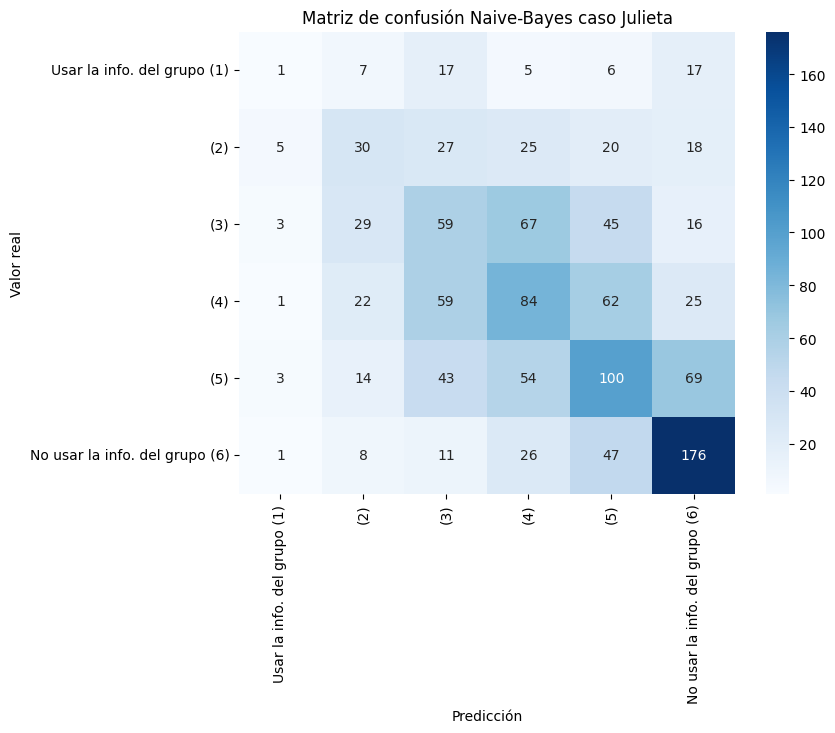

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example class labels
class_labels = ['Usar la info. del grupo (1)', '(2)', '(3)', '(4)', '(5)', 'No usar la info. del grupo (6)']

# Convert confusion matrix to NumPy array
cm_array = np.array(cm)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_array, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión Naive-Bayes caso Julieta')

# Show the plot
plt.show()

In [9]:
df.loc[(df['sel']==2) | (df['sel']==3),'sel'] = 1
df.loc[(df['sel']==4) | (df['sel']==5),'sel'] = 6

df.head()

,sel,comment
id,,
11511,6,Si estudiaste y sabes hacer los ejercicios ¿pa...
11515,6,No debería usar la información ya que no es co...
11516,6,si es que no sabe realizar la pregunta puede r...
11517,1,lamentablemente este pais es muy injusto y la ...
11519,6,Considerando que Julieta pudo optar por una be...


In [10]:
df['sel'].value_counts()

6    3214
1    1592
Name: sel, dtype: int64

In [11]:
df_train_binary, df_test_binary, y_train_binary, y_test_binary = train_test_split(df, df['sel'], test_size=.25, stratify=df['sel'], random_state=0)

bog_pipeline_binary = Pipeline(
    [("Preprocessing", preprocessing),
    # ("Selection", SelectPercentile(f_classif, percentile=90)),
    ("Clasificador", MultinomialNB())]
)

bog_pipeline_binary.fit(df_train_binary,y_train_binary)

/home/camilo/miniconda3/envs/ethics_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('bag-of-words',
                                                  CountVectorizer(min_df=10,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7f61756ee910>),
                                                  'comment')])),
                ('Clasificador', MultinomialNB())])

In [12]:
y_pred_binary = bog_pipeline_binary.predict(df_test_binary)

print("Resultados clasificador Naive-Bayes multinomial (binario)")
print(classification_report(y_test_binary, y_pred_binary))

Resultados clasificador Naive-Bayes multinomial (binario)
              precision    recall  f1-score   support

           1       0.55      0.52      0.53       398
           6       0.77      0.79      0.78       804

    accuracy                           0.70      1202
   macro avg       0.66      0.65      0.66      1202
weighted avg       0.70      0.70      0.70      1202



### Probabilidad por palabra/n_grama en Naive-Bayes

Comenzamos por extraer el vectorizador

In [13]:
vectorizer = bog_pipeline.named_steps['Preprocessing'].transformers_[0][1]
vectorizer

CountVectorizer(min_df=10, ngram_range=(1, 2),
                tokenizer=<utils.preprocesamiento.StemmerTokenizer object at 0x7f61156843d0>)

In [14]:
from NB_utils import get_probs, get_top_k_ngrams

prob_1, prob_6 = [], []

for ngram in vectorizer.get_feature_names_out():
    probs = get_probs(ngram,bog_pipeline_binary,df_test_binary,'comment')
    prob_1.append(probs[0])
    prob_6.append(probs[1])


op_left, op_right = 'Producir el alimento', 'Resguardar tradiciones/recurso'

get_top_k_ngrams(10,vectorizer,prob_1,prob_6,op_left,op_right);

Top features 'Producir el alimento':
conservar beca 0.9206595377819321
convendría usar 0.8960603239932166
3 , 0.8856254387192265
necesita beca 0.8764101293036727
, convendría 0.8610938214752977
mantengo posición 0.8582663355933152
beca mas 0.8543381571686975
beca estudiar 0.8388885225132914
, significa 0.8382043941192958
asegurar nota 0.8344470468660075

Top features 'Resguardar tradiciones/recurso':
5 , 0.9986610504773475
mala reputación 0.9946562251409237
perjudicaría futuro 0.9887106015441764
5 0.9843377448898873
confiar conocimientos 0.9834915171887515
vida laboral 0.9830425131960348
6 , 0.9820021327574726
laboral . 0.9812420066339943
puede repercutir 0.9809906551828395
debería confiar 0.9799862308935183
